# Meteorological data from fluxtowers
The meteorological data from SILO was replaced by the flux tower meteorological data for the years that were available. The VOM was run:


1) with parameters obtained by optimizing with just SILO-data, and meteorological data corrected with fluxtower-data

2) with parameters obtained by optimizing with meteorological data corrected with fluxtower-data

## Weatherdata


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date

In [3]:
weather_silo = np.genfromtxt("../../data/VOM_input/HowardSprings/dailyweather.prn", names=True)
time_silo = np.arange(datetime(int(weather_silo["Year"][0]),int(weather_silo["Month"][0]),int(weather_silo["Day"][0])), 
                  datetime(int(weather_silo["Year"][-1]),int(weather_silo["Month"][-1]),int(weather_silo["Day"][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)

weather_dingo = np.genfromtxt("../../work/additional_analyses/sens_weatherdata/1_dingo/input/dailyweather.prn", names=True)
time_dingo = np.arange(datetime(int(weather_dingo["Year"][0]),int(weather_dingo["Month"][0]),int(weather_dingo["Day"][0])), 
                  datetime(int(weather_dingo["Year"][-1]),int(weather_dingo["Month"][-1]),int(weather_dingo["Day"][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)


<Figure size 1152x576 with 0 Axes>

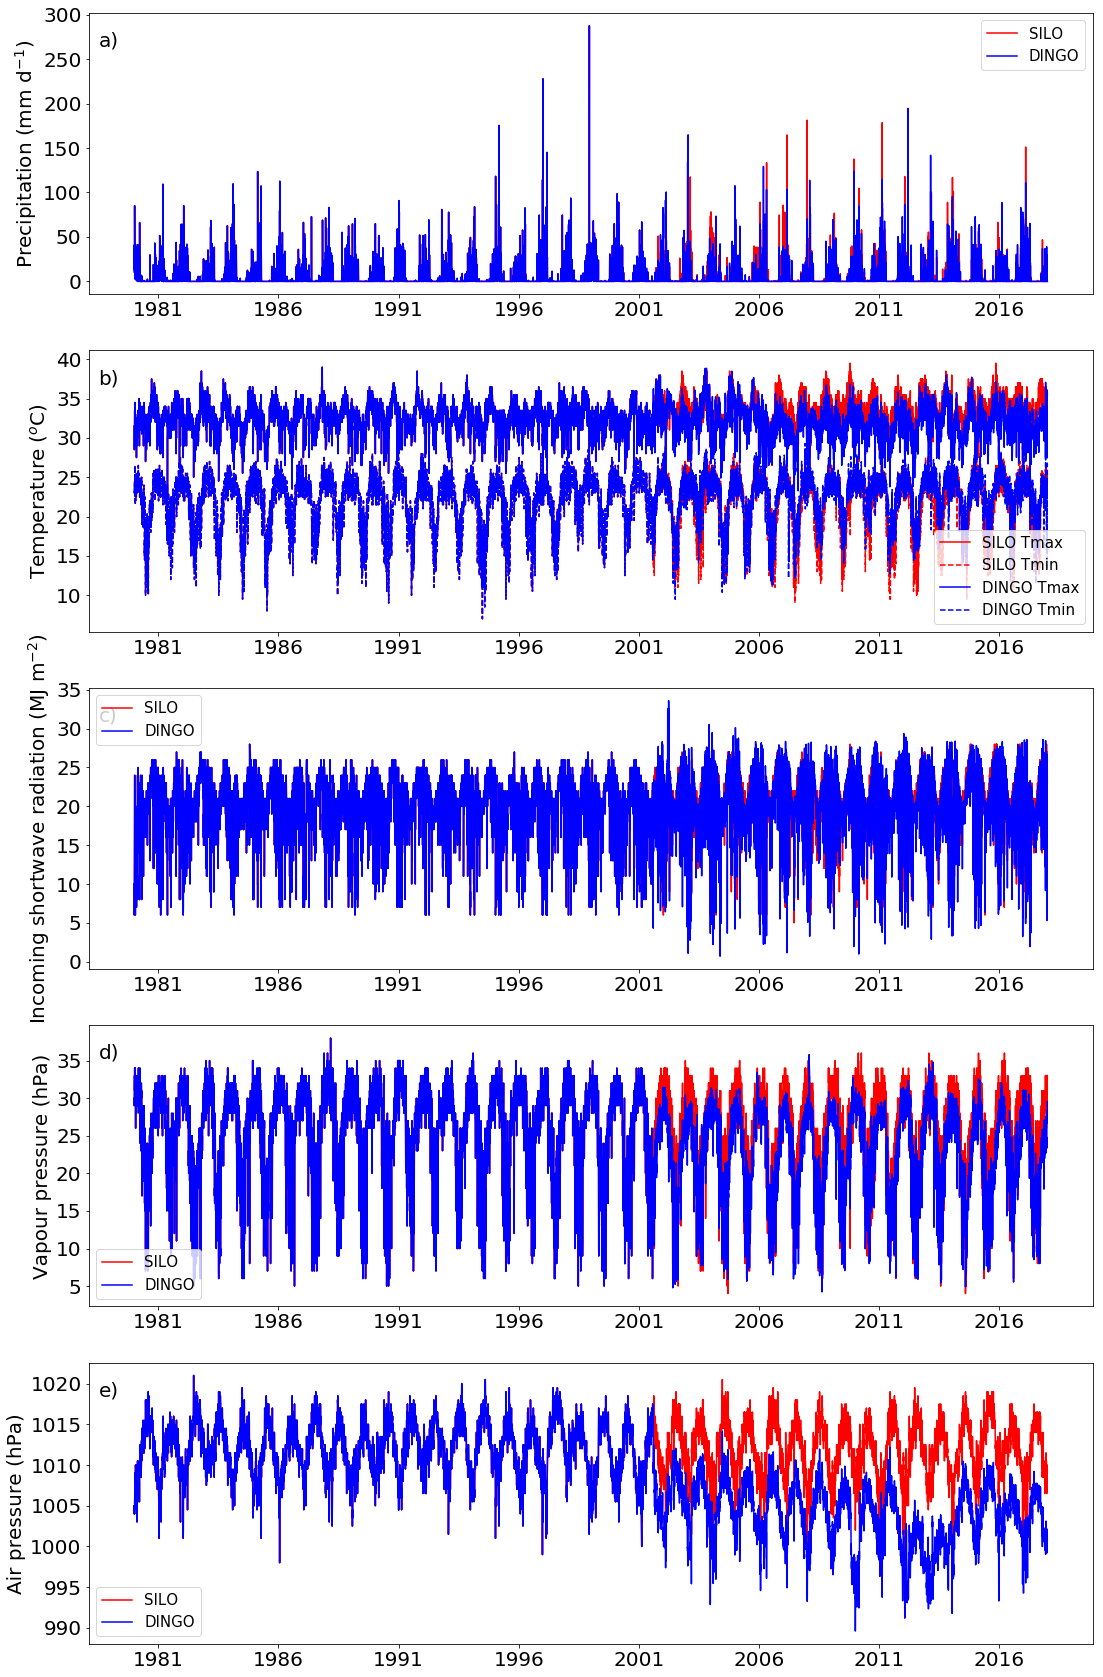

In [4]:
#rainfall

fig=plt.figure(figsize=(16,8), facecolor='w', edgecolor='k' )
fig, ax   = plt.subplots(nrows=5, ncols=1, figsize=(18, 30), sharex=False)   

ax[0].plot(time_silo, weather_silo["Rain"], color="red", label="SILO", zorder=1)           
ax[0].plot(time_dingo, weather_dingo["Rain"], color="blue", label="DINGO", zorder=1)   
ax[0].set_ylabel(r"Precipitation (mm d$^{-}$$^{1}$)", size = 20)
ax[0].text(0.01, 0.9, "a)", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
#ax[0].set_xlim([datetime(2010,1, 1), datetime( 2011, 12, 31)])
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)    
ax[0].legend(prop={'size':15})

#max. temperature
ax[1].plot(time_silo, weather_silo["TMax"], color="red", label="SILO Tmax", zorder=1)   
ax[1].plot(time_silo, weather_silo["TMin"],"--" ,color="red", label="SILO Tmin", zorder=1)           

ax[1].plot(time_dingo, weather_dingo["TMax"], color="blue", label="DINGO Tmax", zorder=1)   
ax[1].plot(time_dingo, weather_dingo["TMin"],"--" ,color="blue", label="DINGO Tmin", zorder=1)   
ax[1].set_ylabel(r"Temperature ($^o$C)", size = 20)
ax[1].text(0.01, 0.9, "b)", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax[1].legend(prop={'size':15})

ax[2].plot(time_silo, weather_silo["Radn"], color="red", label="SILO", zorder=1)           
ax[2].plot(time_dingo, weather_dingo["Radn"], color="blue", label="DINGO", zorder=1)   
ax[2].set_ylabel(r"Incoming shortwave radiation (MJ m$^{-2}$)", size = 20)
ax[2].text(0.01, 0.9, "c)", ha='left', va='center', transform=ax[2].transAxes, fontsize=20)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[2].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax[2].legend(prop={'size':15})

ax[3].plot(time_silo, weather_silo["VP"], color="red", label="SILO", zorder=1)           
ax[3].plot(time_dingo, weather_dingo["VP"], color="blue", label="DINGO", zorder=1)   
ax[3].set_ylabel("Vapour pressure (hPa)", size = 20)
ax[3].text(0.01, 0.9, "d)", ha='left', va='center', transform=ax[3].transAxes, fontsize=20)
for tick in ax[3].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[3].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax[3].legend(prop={'size':15})


ax[4].plot(time_silo, weather_silo["Pres"], color="red", label="SILO", zorder=1)           
ax[4].plot(time_dingo, weather_dingo["Pres"], color="blue", label="DINGO", zorder=1)   
ax[4].set_ylabel("Air pressure (hPa)", size = 20)
ax[4].text(0.01, 0.9, "e)", ha='left', va='center', transform=ax[4].transAxes, fontsize=20)
for tick in ax[4].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[4].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
ax[4].legend(prop={'size':15})

plt.show()


**Figure S8.1.** Timeseries for Howard Springs of a) precipitation, b) daily minimum and maximum temperatures, c) incoming shortwave radiation, d) vapour pressure and e) air pressure. Only air pressures show strong differences for the SILO and the DINGO data.

## Timeseries of evaporation

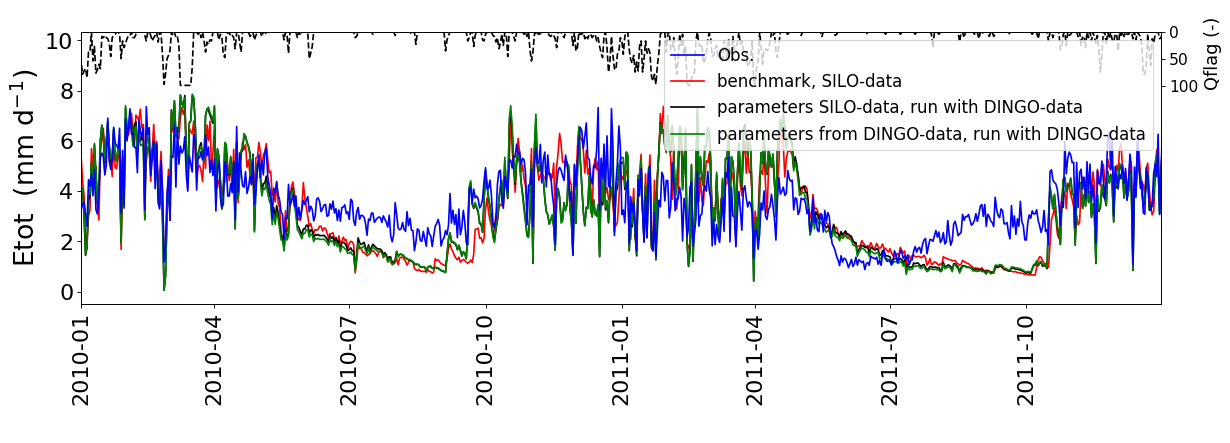

In [5]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/1_dingo/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/2_dingo_sce/sce_best/results_daily.txt \
-v evaptot -ys 2010 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot  (mm d$^{-}$$^{1}$)" \
--labels "benchmark, SILO-data" "parameters SILO-data, run with DINGO-data" "parameters from DINGO-data, run with DINGO-data" --legend True  \
--colors red black green --figsize 18 4 \
--obs_qc ../../data/DINGO_QC/FeQ_howard.txt



**Figure S8.2.** Evaporation at Howard Springs, smoothed with a moving average of 7 days, with the new VOM-simulations using SILO-data as benchmark (red), simulations with the same parameters (i.e. obtained with SILO-data) using the available flux tower data (DINGO) in black, and simulations with newly optimized parameters based on meteorological input data that use the available flux tower data (green). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The differences between the model runs are rather small.

## Timeseries of assimilation


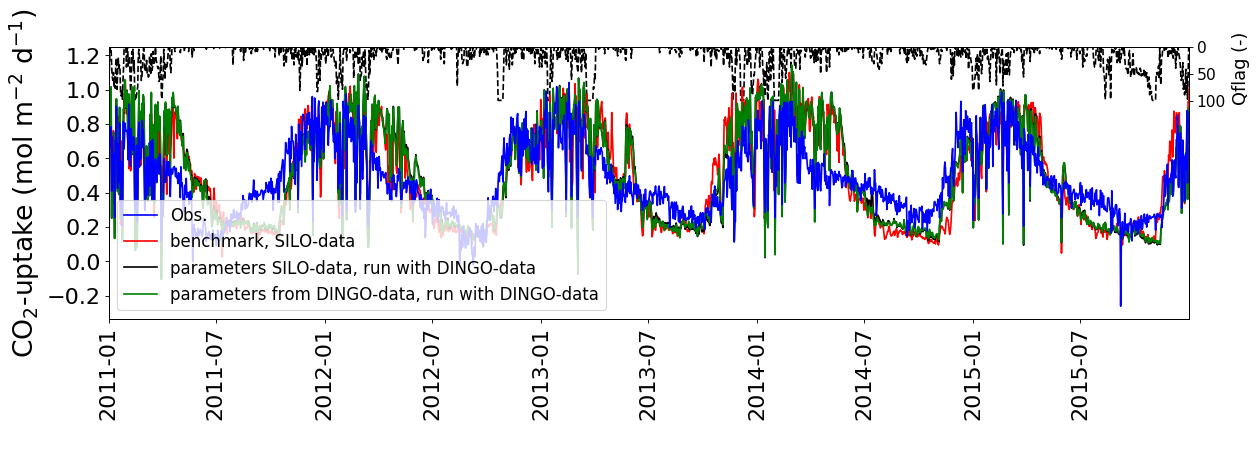

In [6]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/1_dingo/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/sens_weatherdata/2_dingo_sce/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake (mol m$^{-2}$ d$^{-1}$)" \
--labels "benchmark, SILO-data" "parameters SILO-data, run with DINGO-data" "parameters from DINGO-data, run with DINGO-data" --legend True  \
--colors red black green --obs_qc ../../data/DINGO_QC/FcQ_howard.txt --figsize 18 4



**Figure S8.3.** Assimilation at Howard Springs, smoothed with a moving average of 7 days, with the new VOM-simulations using SILO-data as benchmark (red), simulations with the same parameters (i.e. obtained with SILO-data) using the available flux tower data (DINGO) in black, and simulations with newly optimized parameters based on meteorological input data that use the available flux tower data (green). The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 